# <span style="color:palevioletred">Laboratorio de regresión logística</span>

|                |   |
:----------------|---|
| **Nombre**     | Ana Sofía Hinojosa Bale  |
| **Fecha**      | 2 de octubre 2025  |
| **Expediente** | 742594  | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data = pd.read_csv("Default.csv")

2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [3]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [5]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

Las columnas que hay en el DataFrame "data", son:

- `default`, que contiene valores de 'sí' o 'no', el tipo de dato es object.
- `student`, que contiene valores de 'sí' o 'no', el tipo de dato es object.
- `balance`, que contiene valores con media de 835.37, el tipo de dato es float64.
- `income`, que contiene valores con media de 33516.98, el tipo de dato es float64. 

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [6]:
data['default'] = data['default'].astype('category')
data['student'] = data['student'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.1 KB


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Axes: title={'center': 'income'}, xlabel='default'>

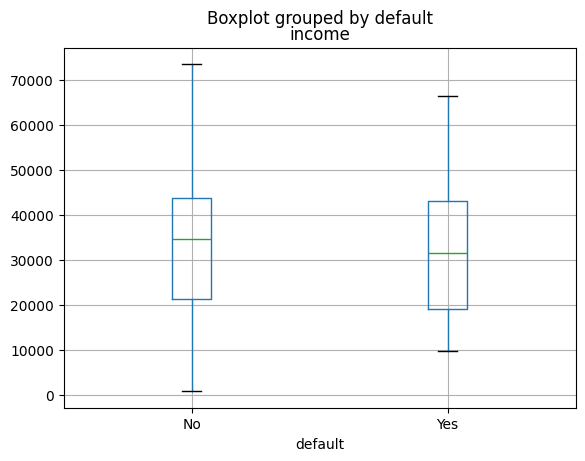

In [8]:
data.boxplot(column='income', by='default')


<Axes: title={'center': 'balance'}, xlabel='default'>

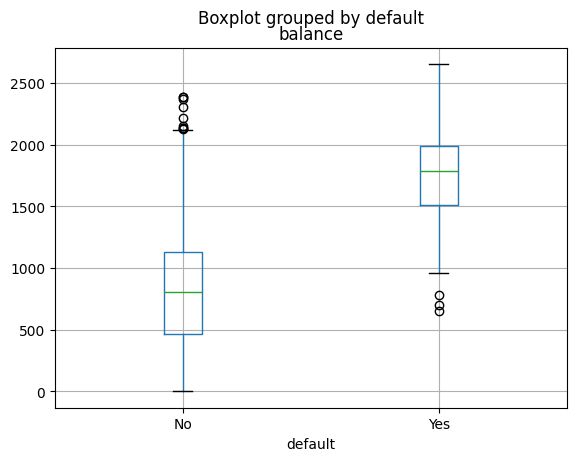

In [9]:
data.boxplot(column='balance', by='default')

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Axes: xlabel='balance', ylabel='income'>

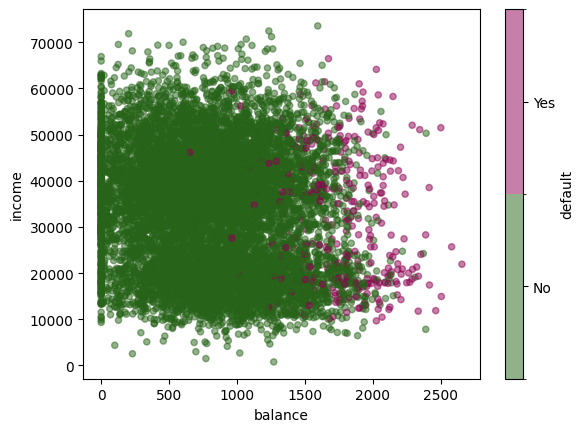

In [10]:
data.plot.scatter(x='balance', y='income', c='default', colormap='PiYG_r', marker='o', alpha=0.5)

<Figure size 1000x600 with 0 Axes>

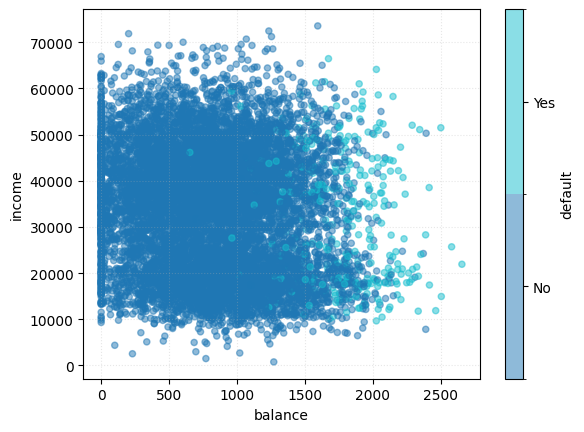

In [11]:
plt.figure(figsize=(10, 6))
data.plot.scatter(x='balance', y='income', c='default', colormap='tab10', marker='o', alpha=0.5)
plt.grid(linestyle=':', alpha=0.3)

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [12]:
y = data['default'] == 'Yes'
x = data['balance']

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

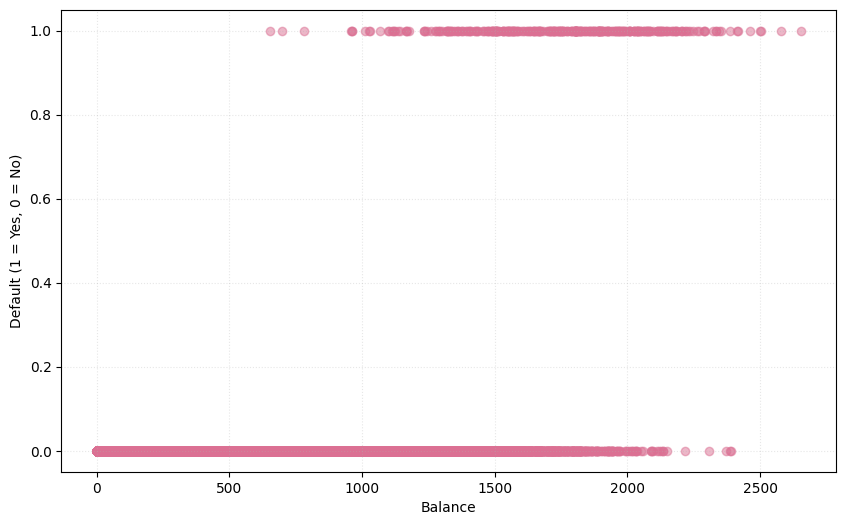

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color = 'palevioletred')
plt.xlabel('Balance')
plt.ylabel('Default (1 = Yes, 0 = No)')
plt.grid(linestyle=':', alpha=0.3)

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [14]:
x = x.values.reshape(-1, 1)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [16]:
model.coef_, model.intercept_

(array([[0.00549892]]), array([-10.65132824]))

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [17]:
beta_x = model.intercept_ + model.coef_ * x
p = 1 / (1 + np.exp(-beta_x))
p

array([[1.30568146e-03],
       [2.11259754e-03],
       [8.59474814e-03],
       ...,
       [2.46651596e-03],
       [1.16759635e-01],
       [7.14476480e-05]])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [18]:
q = 1 - p
q

array([[0.99869432],
       [0.9978874 ],
       [0.99140525],
       ...,
       [0.99753348],
       [0.88324037],
       [0.99992855]])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [19]:
V = np.diagflat(p * (1 - p))

In [20]:
V

array([[1.30397665e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10813447e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52087844e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46043226e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03126823e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14425432e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [21]:
cov = np.linalg.inv(x.T @ V @ x)
cov

array([[1.71411499e-09]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [22]:
se = np.sqrt(np.diag(cov))
se

array([4.14018718e-05])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [23]:
z = model.coef_ / se
z

array([[132.81804209]])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [24]:
p_value = 2 * (1 - norm.cdf(np.abs(z)))
p_value

array([[0.]])

¿Es significativa la relación de los factores con la variable de respuesta?

Sí, ya que el p-value es igual a cero, menor a 0.05, por lo que se puede decir que la relación si es significativa.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [25]:
x = data['student'] == 'Yes'

In [26]:
x

0       False
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: student, Length: 10000, dtype: bool

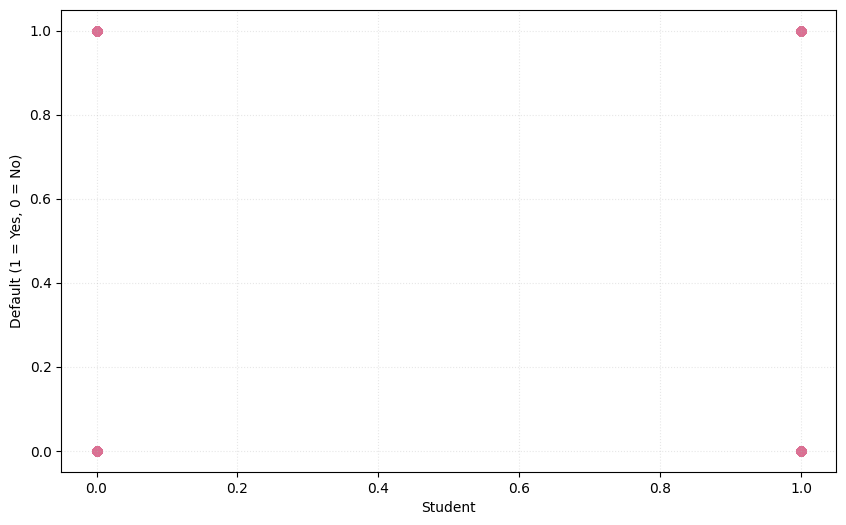

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color = 'palevioletred')
plt.xlabel('Student')
plt.ylabel('Default (1 = Yes, 0 = No)')
plt.grid(linestyle=':', alpha=0.3)

In [28]:
x = x.values.reshape(-1, 1)

In [29]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [30]:
model.coef_, model.intercept_

(array([[0.39620888]]), array([-3.50257249]))

In [31]:
beta_x = model.intercept_ + model.coef_ * x
p = 1 / (1 + np.exp(-beta_x))
p

array([[0.02923912],
       [0.04284552],
       [0.02923912],
       ...,
       [0.02923912],
       [0.02923912],
       [0.04284552]])

In [32]:
q = 1 - p
q

array([[0.97076088],
       [0.95715448],
       [0.97076088],
       ...,
       [0.97076088],
       [0.97076088],
       [0.95715448]])

In [33]:
V = np.diagflat(p * (1 - p))

In [34]:
V

array([[0.0283842 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04100979, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0283842 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0283842 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0283842 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04100979]])

In [35]:
cov = np.linalg.inv(x.T @ V @ x)
cov

array([[0.00828275]])

In [36]:
se = np.sqrt(np.diag(cov))
se

array([0.09100963])

In [37]:
z = model.coef_ / se
z

array([[4.35348308]])

In [38]:
p_value = 2 * (1 - norm.cdf(np.abs(z)))
p_value

array([[1.33991442e-05]])

Sí, ya que el p-value es menor a 0.05, por lo que se puede decir que la relación si es significativa.

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [39]:
x = data[['balance', 'income', 'student']]

In [40]:
x = pd.get_dummies(x, columns=['student'], drop_first=True)
x = x.astype(np.float64)

In [41]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [42]:
model.coef_, model.intercept_

(array([[ 5.73061112e-03,  3.96163064e-06, -6.12572832e-01]]),
 array([-10.9018078]))

In [43]:
beta_x = model.intercept_ + np.dot(x, model.coef_.T)
p = 1 / (1 + np.exp(-beta_x))
p

array([[1.43460401e-03],
       [1.13104967e-03],
       [9.71939127e-03],
       ...,
       [2.94474001e-03],
       [1.46145563e-01],
       [3.37610525e-05]])

In [44]:
q = 1 - p
q

array([[0.9985654 ],
       [0.99886895],
       [0.99028061],
       ...,
       [0.99705526],
       [0.85385444],
       [0.99996624]])

In [45]:
V = np.diagflat(p * (1 - p))

In [46]:
V

array([[1.43254592e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.12977040e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.62492470e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.93606852e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.24787037e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.37599127e-05]])

In [47]:
cov = np.linalg.inv(x.T @ V @ x)
cov

array([[ 2.58276015e-08, -9.30418949e-10, -2.77238244e-05],
       [-9.30418949e-10,  3.77101067e-11,  9.23727128e-07],
       [-2.77238244e-05,  9.23727128e-07,  4.39895242e-02]])

In [48]:
se = np.sqrt(np.diag(cov))
se

array([1.60709681e-04, 6.14085554e-06, 2.09736797e-01])

In [49]:
z = model.coef_ / se
z

array([[35.65815756,  0.64512683, -2.9206741 ]])

In [50]:
p_value = 2 * (1 - norm.cdf(np.abs(z)))
p_value

array([[0.        , 0.518845  , 0.00349275]])

En el caso de balance y student, las relaciones sí son significativas, ya que ambos p-values son menores a 0.05. En el caso de income, la relación no es sigificativa, ya que el p-value es mayor a 0.05 y no se puede decir que la relación que se tenga no sea debido al azar.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

In [51]:
p_pred = (p >= 0.5)
p_pred = p_pred.flatten()
TP = np.sum((y == 1) & (p_pred == 1))
FP = np.sum((y == 0) & (p_pred == 1))
TN = np.sum((y == 0) & (p_pred == 0))
FN = np.sum((y == 1) & (p_pred == 0))

In [52]:
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

In [53]:
specificity, sensitivity, accuracy

(np.float64(0.9958622116478743),
 np.float64(0.3153153153153153),
 np.float64(0.9732))

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

1. En el caso de que le digan a alguien que sí quedó seleccionado para irse de intercambio aunque no haya quedado verdaderamente **(falso positivo)**, entonces compra vuelos y busca un departamento donde quedarse, y luego pierde todo ese dinero. Por otro lado, decirle a la persona que no se quedó seleccionada para el intercambio cuando en realidad sí quedó **(falso negativo)** puede generar que se retrase con trámites y cosas parecidas, pero el otro caso me parece peor.

2. En el caso de que le aceptan un crédito a una persona que en verdad no podrá pagar **(falso positivo)**, la persona se endeuda, el banco pierde dinero, y se generan problemas financieros graves. Por otro lado, si no le aceptan un crédito a una persona que sí podría pagar **(falso negativo)**, la persona pierde la oportunidad de inversión o consumo, pero no se hunde en deudas ni el banco sufre pérdidas.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

1. En el caso de un diagnóstico de cáncer, si la persona sí tiene cáncer pero el sistema predice que no lo tiene **(falso negativo)**, el paciente no recibirá tratamiento a tiempo y la enfermedad puede avanzar hasta provocar su muerte. Por otro lado, decir que la persona tiene cáncer cuando en realidad no lo tiene **(falso positivo)** también es grave, pero no tanto como el otro caso.

2. En el caso de la seguridad en un aeropuerto o lugar similar, si el sistema no predice que una persona lleva armas cuando sí las lleva **(falso negativo)**, puede resultar en la muerte de terceros o en un atentado. Por otro lado, predecir que la persoona lleva armas cuando no las lleva **(falso positivo)** es estresante para la persona, genera molestias y retrasos, pero no es tan grave como el caso contrario.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3